In [1]:
import cv2
import numpy as np

!git clone https://github.com/arunponnusamy/object-detection-opencv/

Cloning into 'object-detection-opencv'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), done.


In [0]:
IMAGE = cv2.imread('ppl.jpg')
CONFIG = './object-detection-opencv/yolov3.cfg'
CLASSES = './object-detection-opencv/yolov3.txt'
WEIGHTS = 'yolov3.weights'

In [3]:
import os
print(os.path.exists(CONFIG))
print(os.path.exists(CLASSES))
print(os.path.exists(WEIGHTS))

True
True
True


In [0]:
classes = None
with open(CLASSES, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

scale = 0.00392
conf_threshold = 0.5
nms_threshold = 0.4

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))


In [0]:
def get_output_layers(net):
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
  return output_layers

def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
  label = str(classes[class_id])
  
  color = COLORS[class_id]
  cv2.rectangle(img, (x,y), (x_plus_w, y_plus_h), color, 2)
  cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [0]:
def processImage(image):

  Width = image.shape[1]
  Height = image.shape[0]

  net = cv2.dnn.readNet( WEIGHTS, CONFIG)

  blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop = False)

  net.setInput(blob)

  outs = net.forward(get_output_layers(net))

  class_ids = []
  confidences = []
  boxes = []
  count = 0
  
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5:
        center_x = int(detection[0] * Width)
        center_y = int(detection[1] * Height)
        w = int(detection[2] * Width)
        h = int(detection[3] * Height)
        x = center_x - w / 2
        y = center_y - h / 2
        class_ids.append(class_id)
        confidences.append(float(confidence))
        boxes.append([x, y, w, h])

  indices = cv2.dnn.NMSBoxes( boxes, confidences, conf_threshold, nms_threshold)

  for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]

    draw_bounding_box( image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    if str(classes[class_id])=='person':
      count += 1
  out_image_name = "latest2"
  cv2.imwrite(out_image_name+".jpg", image)
  print(count)

In [7]:
processImage(IMAGE)
cv2.destroyAllWindows()

6


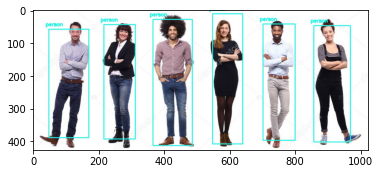

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('latest2.jpg')
plt.imshow(img)